# 17일차
## 머신러닝
### 복습문제
#### 1 . 선형회귀를 그래프로 나타낸 경우이다.
- 속성이 하나일때, x축과 y축은 무엇을 나타내는가?   x값에 대해 y값을 예측
- 속성이 하나일때, 결과의 모양은 ___이다.    선
- 속성이 두개일때, 결과의 모양은 ___이다.    평면이다
- 속성이 세개 이상일때, 결과의 모양은 ___이다.   초평면

#### 2. 속성이 2개일때, 선형회귀의 방정식을 쓰고 해당하는 신경망 구조로 변환하시오.(방정식의 기호를 신경망에 대응하시오)
y^=w1x1+w2x2+b

#### 3. 행복 데이터에서,GDP 로 기대수명을 예측하는 선형회귀를 적용하고 분석해 보시오.(그래프를 그리고, 가중치 값의 의미 해석 등)
- 'Logged GDP'가 아닌 실제 GDP로 위의 결과를 재해석해 보시오.
- 기대수명으로 GDP를 예측하면 어떻개 되는지 생각해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
X=happy[['Logged GDP per capita']].values
y=happy['Healthy life expectancy'].values

In [5]:
X.shape,y.shape

((149, 1), (149,))

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [9]:
w=model.coef_[0]
w

5.01614233919658

In [10]:
b=model.intercept_
b

17.679500487486337

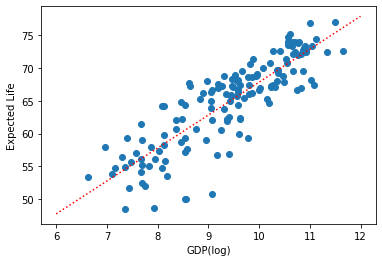

In [17]:
plt.scatter(X[:,0],y)
plt.xlabel('GDP(log)')
plt.ylabel('Expected Life')

xval=np.array([6,12])
yval=xval*w+b
plt.plot(xval,yval,'r:')
#plt.axis('equal')

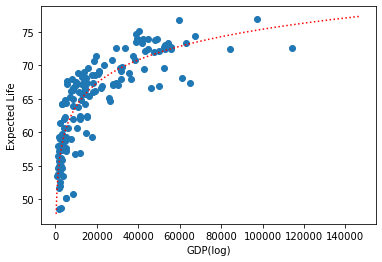

In [19]:
plt.scatter(np.exp(X[:,0]),y)
plt.xlabel('GDP(log)')
plt.ylabel('Expected Life')

xval=np.arange(6,12,0.1)
yval=xval*w+b
plt.plot(np.exp(xval),yval,'r:')
#plt.axis('equal')

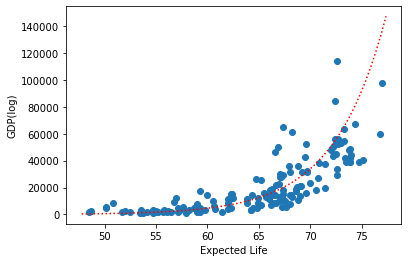

In [21]:
plt.scatter(y,np.exp(X[:,0]))
plt.ylabel('GDP(log)')
plt.xlabel('Expected Life')

xval=np.arange(6,12,0.1)
yval=xval*w+b
plt.plot(yval,np.exp(xval),'r:')
#plt.axis('equal')

In [22]:
w=1.
b=1.

In [23]:
pred_y=w*X[:,0]+b

In [24]:
pred_y

array([11.775, 11.933, 12.117, 11.878, 11.932, 12.053, 11.867, 12.647,
       11.643, 11.906, 11.796, 11.575, 11.873, 11.776, 12.342, 10.88 ,
       11.707, 11.556, 12.023, 11.823, 11.704, 11.669, 11.674, 11.871,
       12.085, 11.743, 11.571, 11.623, 11.529, 10.053, 10.966, 12.488,
       10.318, 11.369, 10.577, 10.859, 10.186, 11.499, 11.576, 11.481,
       11.35 ,  9.836, 11.071, 11.382, 11.155, 11.284, 11.817, 10.787,
       10.054, 11.008, 11.315, 10.557, 11.358, 10.805,  9.62 , 11.611,
       10.962, 11.421,  9.648, 11.217, 10.076, 11.651, 10.458, 10.59 ,
       10.454, 10.313,  9.538, 11.279, 10.046, 10.4  , 10.448, 10.94 ,
       10.802, 11.576, 10.853, 11.189, 12.   ,  9.091,  9.973, 10.622,
       11.238, 10.365,  9.117, 10.673,  9.551, 10.487,  9.12 , 11.016,
       10.826, 10.569,  9.189,  9.118, 10.52 , 10.693,  9.58 ,  8.098,
       10.629,  8.686,  9.087,  9.947,  9.454,  8.838, 10.403, 11.24 ,
        9.458,  9.903, 10.073, 10.585, 10.342, 10.436, 10.24 , 10.603,
      

In [25]:
y

array([72.   , 72.7  , 74.4  , 73.   , 72.4  , 73.3  , 72.7  , 72.6  ,
       73.4  , 73.3  , 73.9  , 73.503, 72.5  , 73.8  , 72.4  , 71.4  ,
       72.5  , 70.807, 68.2  , 72.199, 74.   , 69.495, 72.2  , 69.6  ,
       67.333, 66.603, 74.7  , 73.8  , 71.4  , 64.958, 69.1  , 76.953,
       63.813, 69.201, 66.601, 68.597, 67.5  , 67.906, 73.898, 68.8  ,
       69.652, 65.255, 70.   , 69.702, 65.2  , 67.355, 66.9  , 68.6  ,
       66.402, 66.701, 67.1  , 68.001, 68.   , 67.401, 67.657, 75.1  ,
       69.   , 72.6  , 67.3  , 70.799, 62.   , 73.9  , 68.25 , 68.098,
       65.699, 68.8  , 64.401, 72.6  , 63.901, 62.5  , 65.9  , 68.699,
       66.102, 73.898, 66.253, 64.703, 76.82 , 64.281, 68.034, 62.3  ,
       67.102, 62.236, 58.221, 69.593, 50.114, 67.055, 64.233, 67.   ,
       70.6  , 65.656, 53.515, 59.802, 68.999, 65.474, 57.586, 53.78 ,
       62.409, 55.16 , 54.713, 58.968, 64.8  , 55.008, 56.904, 67.199,
       58.709, 66.208, 66.7  , 64.3  , 66.005, 64.902, 60.583, 59.962,
      

In [27]:
error=((y-pred_y)**2).mean() #Mean Squared Error
error

3010.2332125369126

In [28]:
# 오차를 줄여야 한다.
# w 값을 바꿔보자.
w1=w-0.1 #0.9
pred_y=w1*X[:,0]+b
((y-pred_y)**2).mean()

3115.132563164362

In [29]:
w2=w+0.1
pred_y=w2*X[:,0]+b
((y-pred_y)**2).mean()

2907.139859848926

In [31]:
b1=b-0.1
pred_y=w*X[:,0]+b1
((y-pred_y)**2).mean()

3021.1553306577184

In [32]:
b2=b+0.1
pred_y=w*X[:,0]+b2
((y-pred_y)**2).mean()

2999.331094416107

In [53]:
w = 1.
b = 1.

delta = 0.001

pred_y = w * X[:,0] + b
error = ((y-pred_y)**2).mean()
print(error)

for epoch in range(100000): #epoch 반복을 나타낼때 씀.
    w_next = w
    b_next = b
    
    w1 = w+delta
    pred_y = w1*X[:,0] + b
    error1 = ((y-pred_y)**2).mean()
    
    w2 = w-delta
    pred_y = w2*X[:,0] + b
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<=error2):
        w_next = w1
    if (error2<error) and (error2<error1):
        w_next = w2
        
    b1 = b+delta
    pred_y = w*X[:,0] + b1
    error1 = ((y-pred_y)**2).mean()
    
    b2 = b-delta
    pred_y = w*X[:,0] + b2
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<=error2):
        b_next = b1
    if (error2<error) and (error2<error1):
        b_next = b2
        
    w = w_next
    b = b_next
    pred_y = w * X[:,0] + b
    error = ((y-pred_y)**2).mean()
    if epoch%10==0: 
        print('%5d: %.2f, %.2f, %.5f' % (epoch, w, b, error))

3010.2332125369126
    0: 1.00, 1.00, 3009.08424
   10: 1.01, 1.01, 2997.60661
   20: 1.02, 1.02, 2986.15102
   30: 1.03, 1.03, 2974.71745
   40: 1.04, 1.04, 2963.30593
   50: 1.05, 1.05, 2951.91643
   60: 1.06, 1.06, 2940.54897
   70: 1.07, 1.07, 2929.20354
   80: 1.08, 1.08, 2917.88014
   90: 1.09, 1.09, 2906.57878
  100: 1.10, 1.10, 2895.29944
  110: 1.11, 1.11, 2884.04215
  120: 1.12, 1.12, 2872.80688
  130: 1.13, 1.13, 2861.59365
  140: 1.14, 1.14, 2850.40245
  150: 1.15, 1.15, 2839.23328
  160: 1.16, 1.16, 2828.08615
  170: 1.17, 1.17, 2816.96104
  180: 1.18, 1.18, 2805.85798
  190: 1.19, 1.19, 2794.77694
  200: 1.20, 1.20, 2783.71794
  210: 1.21, 1.21, 2772.68097
  220: 1.22, 1.22, 2761.66603
  230: 1.23, 1.23, 2750.67313
  240: 1.24, 1.24, 2739.70225
  250: 1.25, 1.25, 2728.75342
  260: 1.26, 1.26, 2717.82661
  270: 1.27, 1.27, 2706.92184
  280: 1.28, 1.28, 2696.03910
  290: 1.29, 1.29, 2685.17839
  300: 1.30, 1.30, 2674.33972
  310: 1.31, 1.31, 2663.52307
  320: 1.32, 1.32, 26

 6930: 6.04, 7.93, 13.27233
 6940: 6.03, 7.94, 13.26943
 6950: 6.03, 7.95, 13.26656
 6960: 6.03, 7.96, 13.26368
 6970: 6.03, 7.97, 13.26081
 6980: 6.03, 7.98, 13.25795
 6990: 6.03, 7.99, 13.25508
 7000: 6.03, 8.00, 13.25222
 7010: 6.03, 8.01, 13.24936
 7020: 6.03, 8.02, 13.24651
 7030: 6.02, 8.03, 13.24366
 7040: 6.02, 8.04, 13.24081
 7050: 6.02, 8.05, 13.23797
 7060: 6.02, 8.06, 13.23513
 7070: 6.02, 8.07, 13.23229
 7080: 6.02, 8.08, 13.22945
 7090: 6.02, 8.09, 13.22662
 7100: 6.02, 8.10, 13.22380
 7110: 6.02, 8.11, 13.22097
 7120: 6.02, 8.12, 13.21815
 7130: 6.01, 8.13, 13.21533
 7140: 6.01, 8.14, 13.21252
 7150: 6.01, 8.15, 13.20971
 7160: 6.01, 8.16, 13.20688
 7170: 6.01, 8.17, 13.20407
 7180: 6.01, 8.18, 13.20126
 7190: 6.01, 8.19, 13.19845
 7200: 6.01, 8.20, 13.19565
 7210: 6.01, 8.21, 13.19285
 7220: 6.00, 8.22, 13.19006
 7230: 6.00, 8.23, 13.18726
 7240: 6.00, 8.24, 13.18447
 7250: 6.00, 8.25, 13.18169
 7260: 6.00, 8.26, 13.17891
 7270: 6.00, 8.27, 13.17613
 7280: 6.00, 8.28, 1

11290: 5.58, 12.29, 12.29780
11300: 5.58, 12.30, 12.29621
11310: 5.58, 12.31, 12.29462
11320: 5.58, 12.32, 12.29304
11330: 5.58, 12.33, 12.29146
11340: 5.57, 12.34, 12.28988
11350: 5.57, 12.35, 12.28831
11360: 5.57, 12.36, 12.28674
11370: 5.57, 12.37, 12.28517
11380: 5.57, 12.38, 12.28361
11390: 5.57, 12.39, 12.28205
11400: 5.57, 12.40, 12.28049
11410: 5.57, 12.41, 12.27894
11420: 5.57, 12.42, 12.27739
11430: 5.56, 12.43, 12.27582
11440: 5.56, 12.44, 12.27427
11450: 5.56, 12.45, 12.27272
11460: 5.56, 12.46, 12.27118
11470: 5.56, 12.47, 12.26964
11480: 5.56, 12.48, 12.26810
11490: 5.56, 12.49, 12.26656
11500: 5.56, 12.50, 12.26503
11510: 5.56, 12.51, 12.26350
11520: 5.56, 12.52, 12.26198
11530: 5.55, 12.53, 12.26046
11540: 5.55, 12.54, 12.25894
11550: 5.55, 12.55, 12.25742
11560: 5.55, 12.56, 12.25591
11570: 5.55, 12.57, 12.25440
11580: 5.55, 12.58, 12.25290
11590: 5.55, 12.59, 12.25140
11600: 5.55, 12.60, 12.24990
11610: 5.55, 12.61, 12.24841
11620: 5.55, 12.62, 12.24691
11630: 5.54, 1

15580: 5.13, 16.58, 11.88688
15590: 5.13, 16.59, 11.88656
15600: 5.13, 16.60, 11.88624
15610: 5.13, 16.61, 11.88592
15620: 5.13, 16.62, 11.88561
15630: 5.13, 16.63, 11.88530
15640: 5.13, 16.64, 11.88500
15650: 5.12, 16.65, 11.88470
15660: 5.12, 16.66, 11.88440
15670: 5.12, 16.67, 11.88410
15680: 5.12, 16.68, 11.88381
15690: 5.12, 16.69, 11.88350
15700: 5.12, 16.70, 11.88321
15710: 5.12, 16.71, 11.88292
15720: 5.12, 16.72, 11.88263
15730: 5.12, 16.73, 11.88235
15740: 5.11, 16.74, 11.88207
15750: 5.11, 16.75, 11.88179
15760: 5.11, 16.76, 11.88152
15770: 5.11, 16.77, 11.88125
15780: 5.11, 16.78, 11.88098
15790: 5.11, 16.79, 11.88072
15800: 5.11, 16.80, 11.88046
15810: 5.11, 16.81, 11.88020
15820: 5.11, 16.82, 11.87995
15830: 5.11, 16.83, 11.87970
15840: 5.10, 16.84, 11.87945
15850: 5.10, 16.85, 11.87920
15860: 5.10, 16.86, 11.87896
15870: 5.10, 16.87, 11.87873
15880: 5.10, 16.88, 11.87849
15890: 5.10, 16.89, 11.87826
15900: 5.10, 16.90, 11.87804
15910: 5.10, 16.91, 11.87781
15920: 5.10, 1

22340: 5.05, 17.34, 11.87077
22350: 5.05, 17.34, 11.87077
22360: 5.05, 17.34, 11.87077
22370: 5.05, 17.34, 11.87077
22380: 5.05, 17.34, 11.87077
22390: 5.05, 17.34, 11.87077
22400: 5.05, 17.34, 11.87077
22410: 5.05, 17.34, 11.87077
22420: 5.05, 17.34, 11.87077
22430: 5.05, 17.34, 11.87077
22440: 5.05, 17.34, 11.87077
22450: 5.05, 17.34, 11.87077
22460: 5.05, 17.34, 11.87077
22470: 5.05, 17.34, 11.87077
22480: 5.05, 17.34, 11.87077
22490: 5.05, 17.34, 11.87077
22500: 5.05, 17.34, 11.87077
22510: 5.05, 17.34, 11.87077
22520: 5.05, 17.34, 11.87077
22530: 5.05, 17.34, 11.87077
22540: 5.05, 17.34, 11.87077
22550: 5.05, 17.34, 11.87077
22560: 5.05, 17.34, 11.87077
22570: 5.05, 17.34, 11.87077
22580: 5.05, 17.34, 11.87077
22590: 5.05, 17.34, 11.87077
22600: 5.05, 17.34, 11.87077
22610: 5.05, 17.34, 11.87077
22620: 5.05, 17.34, 11.87077
22630: 5.05, 17.34, 11.87077
22640: 5.05, 17.34, 11.87077
22650: 5.05, 17.34, 11.87077
22660: 5.05, 17.34, 11.87077
22670: 5.05, 17.34, 11.87077
22680: 5.05, 1

28000: 5.05, 17.34, 11.87077
28010: 5.05, 17.34, 11.87077
28020: 5.05, 17.34, 11.87077
28030: 5.05, 17.34, 11.87077
28040: 5.05, 17.34, 11.87077
28050: 5.05, 17.34, 11.87077
28060: 5.05, 17.34, 11.87077
28070: 5.05, 17.34, 11.87077
28080: 5.05, 17.34, 11.87077
28090: 5.05, 17.34, 11.87077
28100: 5.05, 17.34, 11.87077
28110: 5.05, 17.34, 11.87077
28120: 5.05, 17.34, 11.87077
28130: 5.05, 17.34, 11.87077
28140: 5.05, 17.34, 11.87077
28150: 5.05, 17.34, 11.87077
28160: 5.05, 17.34, 11.87077
28170: 5.05, 17.34, 11.87077
28180: 5.05, 17.34, 11.87077
28190: 5.05, 17.34, 11.87077
28200: 5.05, 17.34, 11.87077
28210: 5.05, 17.34, 11.87077
28220: 5.05, 17.34, 11.87077
28230: 5.05, 17.34, 11.87077
28240: 5.05, 17.34, 11.87077
28250: 5.05, 17.34, 11.87077
28260: 5.05, 17.34, 11.87077
28270: 5.05, 17.34, 11.87077
28280: 5.05, 17.34, 11.87077
28290: 5.05, 17.34, 11.87077
28300: 5.05, 17.34, 11.87077
28310: 5.05, 17.34, 11.87077
28320: 5.05, 17.34, 11.87077
28330: 5.05, 17.34, 11.87077
28340: 5.05, 1

32830: 5.05, 17.34, 11.87077
32840: 5.05, 17.34, 11.87077
32850: 5.05, 17.34, 11.87077
32860: 5.05, 17.34, 11.87077
32870: 5.05, 17.34, 11.87077
32880: 5.05, 17.34, 11.87077
32890: 5.05, 17.34, 11.87077
32900: 5.05, 17.34, 11.87077
32910: 5.05, 17.34, 11.87077
32920: 5.05, 17.34, 11.87077
32930: 5.05, 17.34, 11.87077
32940: 5.05, 17.34, 11.87077
32950: 5.05, 17.34, 11.87077
32960: 5.05, 17.34, 11.87077
32970: 5.05, 17.34, 11.87077
32980: 5.05, 17.34, 11.87077
32990: 5.05, 17.34, 11.87077
33000: 5.05, 17.34, 11.87077
33010: 5.05, 17.34, 11.87077
33020: 5.05, 17.34, 11.87077
33030: 5.05, 17.34, 11.87077
33040: 5.05, 17.34, 11.87077
33050: 5.05, 17.34, 11.87077
33060: 5.05, 17.34, 11.87077
33070: 5.05, 17.34, 11.87077
33080: 5.05, 17.34, 11.87077
33090: 5.05, 17.34, 11.87077
33100: 5.05, 17.34, 11.87077
33110: 5.05, 17.34, 11.87077
33120: 5.05, 17.34, 11.87077
33130: 5.05, 17.34, 11.87077
33140: 5.05, 17.34, 11.87077
33150: 5.05, 17.34, 11.87077
33160: 5.05, 17.34, 11.87077
33170: 5.05, 1

37910: 5.05, 17.34, 11.87077
37920: 5.05, 17.34, 11.87077
37930: 5.05, 17.34, 11.87077
37940: 5.05, 17.34, 11.87077
37950: 5.05, 17.34, 11.87077
37960: 5.05, 17.34, 11.87077
37970: 5.05, 17.34, 11.87077
37980: 5.05, 17.34, 11.87077
37990: 5.05, 17.34, 11.87077
38000: 5.05, 17.34, 11.87077
38010: 5.05, 17.34, 11.87077
38020: 5.05, 17.34, 11.87077
38030: 5.05, 17.34, 11.87077
38040: 5.05, 17.34, 11.87077
38050: 5.05, 17.34, 11.87077
38060: 5.05, 17.34, 11.87077
38070: 5.05, 17.34, 11.87077
38080: 5.05, 17.34, 11.87077
38090: 5.05, 17.34, 11.87077
38100: 5.05, 17.34, 11.87077
38110: 5.05, 17.34, 11.87077
38120: 5.05, 17.34, 11.87077
38130: 5.05, 17.34, 11.87077
38140: 5.05, 17.34, 11.87077
38150: 5.05, 17.34, 11.87077
38160: 5.05, 17.34, 11.87077
38170: 5.05, 17.34, 11.87077
38180: 5.05, 17.34, 11.87077
38190: 5.05, 17.34, 11.87077
38200: 5.05, 17.34, 11.87077
38210: 5.05, 17.34, 11.87077
38220: 5.05, 17.34, 11.87077
38230: 5.05, 17.34, 11.87077
38240: 5.05, 17.34, 11.87077
38250: 5.05, 1

44300: 5.05, 17.34, 11.87077
44310: 5.05, 17.34, 11.87077
44320: 5.05, 17.34, 11.87077
44330: 5.05, 17.34, 11.87077
44340: 5.05, 17.34, 11.87077
44350: 5.05, 17.34, 11.87077
44360: 5.05, 17.34, 11.87077
44370: 5.05, 17.34, 11.87077
44380: 5.05, 17.34, 11.87077
44390: 5.05, 17.34, 11.87077
44400: 5.05, 17.34, 11.87077
44410: 5.05, 17.34, 11.87077
44420: 5.05, 17.34, 11.87077
44430: 5.05, 17.34, 11.87077
44440: 5.05, 17.34, 11.87077
44450: 5.05, 17.34, 11.87077
44460: 5.05, 17.34, 11.87077
44470: 5.05, 17.34, 11.87077
44480: 5.05, 17.34, 11.87077
44490: 5.05, 17.34, 11.87077
44500: 5.05, 17.34, 11.87077
44510: 5.05, 17.34, 11.87077
44520: 5.05, 17.34, 11.87077
44530: 5.05, 17.34, 11.87077
44540: 5.05, 17.34, 11.87077
44550: 5.05, 17.34, 11.87077
44560: 5.05, 17.34, 11.87077
44570: 5.05, 17.34, 11.87077
44580: 5.05, 17.34, 11.87077
44590: 5.05, 17.34, 11.87077
44600: 5.05, 17.34, 11.87077
44610: 5.05, 17.34, 11.87077
44620: 5.05, 17.34, 11.87077
44630: 5.05, 17.34, 11.87077
44640: 5.05, 1

48370: 5.05, 17.34, 11.87077
48380: 5.05, 17.34, 11.87077
48390: 5.05, 17.34, 11.87077
48400: 5.05, 17.34, 11.87077
48410: 5.05, 17.34, 11.87077
48420: 5.05, 17.34, 11.87077
48430: 5.05, 17.34, 11.87077
48440: 5.05, 17.34, 11.87077
48450: 5.05, 17.34, 11.87077
48460: 5.05, 17.34, 11.87077
48470: 5.05, 17.34, 11.87077
48480: 5.05, 17.34, 11.87077
48490: 5.05, 17.34, 11.87077
48500: 5.05, 17.34, 11.87077
48510: 5.05, 17.34, 11.87077
48520: 5.05, 17.34, 11.87077
48530: 5.05, 17.34, 11.87077
48540: 5.05, 17.34, 11.87077
48550: 5.05, 17.34, 11.87077
48560: 5.05, 17.34, 11.87077
48570: 5.05, 17.34, 11.87077
48580: 5.05, 17.34, 11.87077
48590: 5.05, 17.34, 11.87077
48600: 5.05, 17.34, 11.87077
48610: 5.05, 17.34, 11.87077
48620: 5.05, 17.34, 11.87077
48630: 5.05, 17.34, 11.87077
48640: 5.05, 17.34, 11.87077
48650: 5.05, 17.34, 11.87077
48660: 5.05, 17.34, 11.87077
48670: 5.05, 17.34, 11.87077
48680: 5.05, 17.34, 11.87077
48690: 5.05, 17.34, 11.87077
48700: 5.05, 17.34, 11.87077
48710: 5.05, 1

52870: 5.05, 17.34, 11.87077
52880: 5.05, 17.34, 11.87077
52890: 5.05, 17.34, 11.87077
52900: 5.05, 17.34, 11.87077
52910: 5.05, 17.34, 11.87077
52920: 5.05, 17.34, 11.87077
52930: 5.05, 17.34, 11.87077
52940: 5.05, 17.34, 11.87077
52950: 5.05, 17.34, 11.87077
52960: 5.05, 17.34, 11.87077
52970: 5.05, 17.34, 11.87077
52980: 5.05, 17.34, 11.87077
52990: 5.05, 17.34, 11.87077
53000: 5.05, 17.34, 11.87077
53010: 5.05, 17.34, 11.87077
53020: 5.05, 17.34, 11.87077
53030: 5.05, 17.34, 11.87077
53040: 5.05, 17.34, 11.87077
53050: 5.05, 17.34, 11.87077
53060: 5.05, 17.34, 11.87077
53070: 5.05, 17.34, 11.87077
53080: 5.05, 17.34, 11.87077
53090: 5.05, 17.34, 11.87077
53100: 5.05, 17.34, 11.87077
53110: 5.05, 17.34, 11.87077
53120: 5.05, 17.34, 11.87077
53130: 5.05, 17.34, 11.87077
53140: 5.05, 17.34, 11.87077
53150: 5.05, 17.34, 11.87077
53160: 5.05, 17.34, 11.87077
53170: 5.05, 17.34, 11.87077
53180: 5.05, 17.34, 11.87077
53190: 5.05, 17.34, 11.87077
53200: 5.05, 17.34, 11.87077
53210: 5.05, 1

59290: 5.05, 17.34, 11.87077
59300: 5.05, 17.34, 11.87077
59310: 5.05, 17.34, 11.87077
59320: 5.05, 17.34, 11.87077
59330: 5.05, 17.34, 11.87077
59340: 5.05, 17.34, 11.87077
59350: 5.05, 17.34, 11.87077
59360: 5.05, 17.34, 11.87077
59370: 5.05, 17.34, 11.87077
59380: 5.05, 17.34, 11.87077
59390: 5.05, 17.34, 11.87077
59400: 5.05, 17.34, 11.87077
59410: 5.05, 17.34, 11.87077
59420: 5.05, 17.34, 11.87077
59430: 5.05, 17.34, 11.87077
59440: 5.05, 17.34, 11.87077
59450: 5.05, 17.34, 11.87077
59460: 5.05, 17.34, 11.87077
59470: 5.05, 17.34, 11.87077
59480: 5.05, 17.34, 11.87077
59490: 5.05, 17.34, 11.87077
59500: 5.05, 17.34, 11.87077
59510: 5.05, 17.34, 11.87077
59520: 5.05, 17.34, 11.87077
59530: 5.05, 17.34, 11.87077
59540: 5.05, 17.34, 11.87077
59550: 5.05, 17.34, 11.87077
59560: 5.05, 17.34, 11.87077
59570: 5.05, 17.34, 11.87077
59580: 5.05, 17.34, 11.87077
59590: 5.05, 17.34, 11.87077
59600: 5.05, 17.34, 11.87077
59610: 5.05, 17.34, 11.87077
59620: 5.05, 17.34, 11.87077
59630: 5.05, 1

63040: 5.05, 17.34, 11.87077
63050: 5.05, 17.34, 11.87077
63060: 5.05, 17.34, 11.87077
63070: 5.05, 17.34, 11.87077
63080: 5.05, 17.34, 11.87077
63090: 5.05, 17.34, 11.87077
63100: 5.05, 17.34, 11.87077
63110: 5.05, 17.34, 11.87077
63120: 5.05, 17.34, 11.87077
63130: 5.05, 17.34, 11.87077
63140: 5.05, 17.34, 11.87077
63150: 5.05, 17.34, 11.87077
63160: 5.05, 17.34, 11.87077
63170: 5.05, 17.34, 11.87077
63180: 5.05, 17.34, 11.87077
63190: 5.05, 17.34, 11.87077
63200: 5.05, 17.34, 11.87077
63210: 5.05, 17.34, 11.87077
63220: 5.05, 17.34, 11.87077
63230: 5.05, 17.34, 11.87077
63240: 5.05, 17.34, 11.87077
63250: 5.05, 17.34, 11.87077
63260: 5.05, 17.34, 11.87077
63270: 5.05, 17.34, 11.87077
63280: 5.05, 17.34, 11.87077
63290: 5.05, 17.34, 11.87077
63300: 5.05, 17.34, 11.87077
63310: 5.05, 17.34, 11.87077
63320: 5.05, 17.34, 11.87077
63330: 5.05, 17.34, 11.87077
63340: 5.05, 17.34, 11.87077
63350: 5.05, 17.34, 11.87077
63360: 5.05, 17.34, 11.87077
63370: 5.05, 17.34, 11.87077
63380: 5.05, 1

67500: 5.05, 17.34, 11.87077
67510: 5.05, 17.34, 11.87077
67520: 5.05, 17.34, 11.87077
67530: 5.05, 17.34, 11.87077
67540: 5.05, 17.34, 11.87077
67550: 5.05, 17.34, 11.87077
67560: 5.05, 17.34, 11.87077
67570: 5.05, 17.34, 11.87077
67580: 5.05, 17.34, 11.87077
67590: 5.05, 17.34, 11.87077
67600: 5.05, 17.34, 11.87077
67610: 5.05, 17.34, 11.87077
67620: 5.05, 17.34, 11.87077
67630: 5.05, 17.34, 11.87077
67640: 5.05, 17.34, 11.87077
67650: 5.05, 17.34, 11.87077
67660: 5.05, 17.34, 11.87077
67670: 5.05, 17.34, 11.87077
67680: 5.05, 17.34, 11.87077
67690: 5.05, 17.34, 11.87077
67700: 5.05, 17.34, 11.87077
67710: 5.05, 17.34, 11.87077
67720: 5.05, 17.34, 11.87077
67730: 5.05, 17.34, 11.87077
67740: 5.05, 17.34, 11.87077
67750: 5.05, 17.34, 11.87077
67760: 5.05, 17.34, 11.87077
67770: 5.05, 17.34, 11.87077
67780: 5.05, 17.34, 11.87077
67790: 5.05, 17.34, 11.87077
67800: 5.05, 17.34, 11.87077
67810: 5.05, 17.34, 11.87077
67820: 5.05, 17.34, 11.87077
67830: 5.05, 17.34, 11.87077
67840: 5.05, 1

72660: 5.05, 17.34, 11.87077
72670: 5.05, 17.34, 11.87077
72680: 5.05, 17.34, 11.87077
72690: 5.05, 17.34, 11.87077
72700: 5.05, 17.34, 11.87077
72710: 5.05, 17.34, 11.87077
72720: 5.05, 17.34, 11.87077
72730: 5.05, 17.34, 11.87077
72740: 5.05, 17.34, 11.87077
72750: 5.05, 17.34, 11.87077
72760: 5.05, 17.34, 11.87077
72770: 5.05, 17.34, 11.87077
72780: 5.05, 17.34, 11.87077
72790: 5.05, 17.34, 11.87077
72800: 5.05, 17.34, 11.87077
72810: 5.05, 17.34, 11.87077
72820: 5.05, 17.34, 11.87077
72830: 5.05, 17.34, 11.87077
72840: 5.05, 17.34, 11.87077
72850: 5.05, 17.34, 11.87077
72860: 5.05, 17.34, 11.87077
72870: 5.05, 17.34, 11.87077
72880: 5.05, 17.34, 11.87077
72890: 5.05, 17.34, 11.87077
72900: 5.05, 17.34, 11.87077
72910: 5.05, 17.34, 11.87077
72920: 5.05, 17.34, 11.87077
72930: 5.05, 17.34, 11.87077
72940: 5.05, 17.34, 11.87077
72950: 5.05, 17.34, 11.87077
72960: 5.05, 17.34, 11.87077
72970: 5.05, 17.34, 11.87077
72980: 5.05, 17.34, 11.87077
72990: 5.05, 17.34, 11.87077
73000: 5.05, 1

76860: 5.05, 17.34, 11.87077
76870: 5.05, 17.34, 11.87077
76880: 5.05, 17.34, 11.87077
76890: 5.05, 17.34, 11.87077
76900: 5.05, 17.34, 11.87077
76910: 5.05, 17.34, 11.87077
76920: 5.05, 17.34, 11.87077
76930: 5.05, 17.34, 11.87077
76940: 5.05, 17.34, 11.87077
76950: 5.05, 17.34, 11.87077
76960: 5.05, 17.34, 11.87077
76970: 5.05, 17.34, 11.87077
76980: 5.05, 17.34, 11.87077
76990: 5.05, 17.34, 11.87077
77000: 5.05, 17.34, 11.87077
77010: 5.05, 17.34, 11.87077
77020: 5.05, 17.34, 11.87077
77030: 5.05, 17.34, 11.87077
77040: 5.05, 17.34, 11.87077
77050: 5.05, 17.34, 11.87077
77060: 5.05, 17.34, 11.87077
77070: 5.05, 17.34, 11.87077
77080: 5.05, 17.34, 11.87077
77090: 5.05, 17.34, 11.87077
77100: 5.05, 17.34, 11.87077
77110: 5.05, 17.34, 11.87077
77120: 5.05, 17.34, 11.87077
77130: 5.05, 17.34, 11.87077
77140: 5.05, 17.34, 11.87077
77150: 5.05, 17.34, 11.87077
77160: 5.05, 17.34, 11.87077
77170: 5.05, 17.34, 11.87077
77180: 5.05, 17.34, 11.87077
77190: 5.05, 17.34, 11.87077
77200: 5.05, 1

81550: 5.05, 17.34, 11.87077
81560: 5.05, 17.34, 11.87077
81570: 5.05, 17.34, 11.87077
81580: 5.05, 17.34, 11.87077
81590: 5.05, 17.34, 11.87077
81600: 5.05, 17.34, 11.87077
81610: 5.05, 17.34, 11.87077
81620: 5.05, 17.34, 11.87077
81630: 5.05, 17.34, 11.87077
81640: 5.05, 17.34, 11.87077
81650: 5.05, 17.34, 11.87077
81660: 5.05, 17.34, 11.87077
81670: 5.05, 17.34, 11.87077
81680: 5.05, 17.34, 11.87077
81690: 5.05, 17.34, 11.87077
81700: 5.05, 17.34, 11.87077
81710: 5.05, 17.34, 11.87077
81720: 5.05, 17.34, 11.87077
81730: 5.05, 17.34, 11.87077
81740: 5.05, 17.34, 11.87077
81750: 5.05, 17.34, 11.87077
81760: 5.05, 17.34, 11.87077
81770: 5.05, 17.34, 11.87077
81780: 5.05, 17.34, 11.87077
81790: 5.05, 17.34, 11.87077
81800: 5.05, 17.34, 11.87077
81810: 5.05, 17.34, 11.87077
81820: 5.05, 17.34, 11.87077
81830: 5.05, 17.34, 11.87077
81840: 5.05, 17.34, 11.87077
81850: 5.05, 17.34, 11.87077
81860: 5.05, 17.34, 11.87077
81870: 5.05, 17.34, 11.87077
81880: 5.05, 17.34, 11.87077
81890: 5.05, 1

87030: 5.05, 17.34, 11.87077
87040: 5.05, 17.34, 11.87077
87050: 5.05, 17.34, 11.87077
87060: 5.05, 17.34, 11.87077
87070: 5.05, 17.34, 11.87077
87080: 5.05, 17.34, 11.87077
87090: 5.05, 17.34, 11.87077
87100: 5.05, 17.34, 11.87077
87110: 5.05, 17.34, 11.87077
87120: 5.05, 17.34, 11.87077
87130: 5.05, 17.34, 11.87077
87140: 5.05, 17.34, 11.87077
87150: 5.05, 17.34, 11.87077
87160: 5.05, 17.34, 11.87077
87170: 5.05, 17.34, 11.87077
87180: 5.05, 17.34, 11.87077
87190: 5.05, 17.34, 11.87077
87200: 5.05, 17.34, 11.87077
87210: 5.05, 17.34, 11.87077
87220: 5.05, 17.34, 11.87077
87230: 5.05, 17.34, 11.87077
87240: 5.05, 17.34, 11.87077
87250: 5.05, 17.34, 11.87077
87260: 5.05, 17.34, 11.87077
87270: 5.05, 17.34, 11.87077
87280: 5.05, 17.34, 11.87077
87290: 5.05, 17.34, 11.87077
87300: 5.05, 17.34, 11.87077
87310: 5.05, 17.34, 11.87077
87320: 5.05, 17.34, 11.87077
87330: 5.05, 17.34, 11.87077
87340: 5.05, 17.34, 11.87077
87350: 5.05, 17.34, 11.87077
87360: 5.05, 17.34, 11.87077
87370: 5.05, 1

94250: 5.05, 17.34, 11.87077
94260: 5.05, 17.34, 11.87077
94270: 5.05, 17.34, 11.87077
94280: 5.05, 17.34, 11.87077
94290: 5.05, 17.34, 11.87077
94300: 5.05, 17.34, 11.87077
94310: 5.05, 17.34, 11.87077
94320: 5.05, 17.34, 11.87077
94330: 5.05, 17.34, 11.87077
94340: 5.05, 17.34, 11.87077
94350: 5.05, 17.34, 11.87077
94360: 5.05, 17.34, 11.87077
94370: 5.05, 17.34, 11.87077
94380: 5.05, 17.34, 11.87077
94390: 5.05, 17.34, 11.87077
94400: 5.05, 17.34, 11.87077
94410: 5.05, 17.34, 11.87077
94420: 5.05, 17.34, 11.87077
94430: 5.05, 17.34, 11.87077
94440: 5.05, 17.34, 11.87077
94450: 5.05, 17.34, 11.87077
94460: 5.05, 17.34, 11.87077
94470: 5.05, 17.34, 11.87077
94480: 5.05, 17.34, 11.87077
94490: 5.05, 17.34, 11.87077
94500: 5.05, 17.34, 11.87077
94510: 5.05, 17.34, 11.87077
94520: 5.05, 17.34, 11.87077
94530: 5.05, 17.34, 11.87077
94540: 5.05, 17.34, 11.87077
94550: 5.05, 17.34, 11.87077
94560: 5.05, 17.34, 11.87077
94570: 5.05, 17.34, 11.87077
94580: 5.05, 17.34, 11.87077
94590: 5.05, 1

In [63]:
w = 1.
b = 1.

delta = 0.01
logs=[]
pred_y = w * X[:,0] + b
error = ((y-pred_y)**2).mean()
print(error)
logs.append(error)

for epoch in range(10000):
    w_next = w
    b_next = b
    
    w1 = w+delta
    pred_y = w1*X[:,0] + b
    error1 = ((y-pred_y)**2).mean()
    
    w2 = w-delta
    pred_y = w2*X[:,0] + b
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<=error2):
        w_next = w1
    if (error2<error) and (error2<error1):
        w_next = w2
        
    b1 = b+delta
    pred_y = w*X[:,0] + b1
    error1 = ((y-pred_y)**2).mean()
    
    b2 = b-delta
    pred_y = w*X[:,0] + b2
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<=error2):
        b_next = b1
    if (error2<error) and (error2<error1):
        b_next = b2
        
    w = w_next
    b = b_next
    pred_y = w * X[:,0] + b
    error = ((y-pred_y)**2).mean()
    print('%5d: %.5f, %.5f, %.5f' % (epoch, w, b, error))
    logs.append(error)

3010.2332125369126
    0: 1.01000, 1.01000, 2998.75338
    1: 1.02000, 1.02000, 2987.29558
    2: 1.03000, 1.03000, 2975.85982
    3: 1.04000, 1.04000, 2964.44609
    4: 1.05000, 1.05000, 2953.05439
    5: 1.06000, 1.06000, 2941.68472
    6: 1.07000, 1.07000, 2930.33709
    7: 1.08000, 1.08000, 2919.01149
    8: 1.09000, 1.09000, 2907.70792
    9: 1.10000, 1.10000, 2896.42639
   10: 1.11000, 1.11000, 2885.16688
   11: 1.12000, 1.12000, 2873.92941
   12: 1.13000, 1.13000, 2862.71398
   13: 1.14000, 1.14000, 2851.52058
   14: 1.15000, 1.15000, 2840.34920
   15: 1.16000, 1.16000, 2829.19987
   16: 1.17000, 1.17000, 2818.07256
   17: 1.18000, 1.18000, 2806.96729
   18: 1.19000, 1.19000, 2795.88405
   19: 1.20000, 1.20000, 2784.82285
   20: 1.21000, 1.21000, 2773.78367
   21: 1.22000, 1.22000, 2762.76653
   22: 1.23000, 1.23000, 2751.77142
   23: 1.24000, 1.24000, 2740.79835
   24: 1.25000, 1.25000, 2729.84731
   25: 1.26000, 1.26000, 2718.91830
   26: 1.27000, 1.27000, 2708.01132
   27: 1.

 1955: 5.35000, 14.53000, 12.01768
 1956: 5.35000, 14.53000, 12.01768
 1957: 5.35000, 14.53000, 12.01768
 1958: 5.35000, 14.53000, 12.01768
 1959: 5.35000, 14.53000, 12.01768
 1960: 5.35000, 14.53000, 12.01768
 1961: 5.35000, 14.53000, 12.01768
 1962: 5.35000, 14.53000, 12.01768
 1963: 5.35000, 14.53000, 12.01768
 1964: 5.35000, 14.53000, 12.01768
 1965: 5.35000, 14.53000, 12.01768
 1966: 5.35000, 14.53000, 12.01768
 1967: 5.35000, 14.53000, 12.01768
 1968: 5.35000, 14.53000, 12.01768
 1969: 5.35000, 14.53000, 12.01768
 1970: 5.35000, 14.53000, 12.01768
 1971: 5.35000, 14.53000, 12.01768
 1972: 5.35000, 14.53000, 12.01768
 1973: 5.35000, 14.53000, 12.01768
 1974: 5.35000, 14.53000, 12.01768
 1975: 5.35000, 14.53000, 12.01768
 1976: 5.35000, 14.53000, 12.01768
 1977: 5.35000, 14.53000, 12.01768
 1978: 5.35000, 14.53000, 12.01768
 1979: 5.35000, 14.53000, 12.01768
 1980: 5.35000, 14.53000, 12.01768
 1981: 5.35000, 14.53000, 12.01768
 1982: 5.35000, 14.53000, 12.01768
 1983: 5.35000, 14.5

 3622: 5.35000, 14.53000, 12.01768
 3623: 5.35000, 14.53000, 12.01768
 3624: 5.35000, 14.53000, 12.01768
 3625: 5.35000, 14.53000, 12.01768
 3626: 5.35000, 14.53000, 12.01768
 3627: 5.35000, 14.53000, 12.01768
 3628: 5.35000, 14.53000, 12.01768
 3629: 5.35000, 14.53000, 12.01768
 3630: 5.35000, 14.53000, 12.01768
 3631: 5.35000, 14.53000, 12.01768
 3632: 5.35000, 14.53000, 12.01768
 3633: 5.35000, 14.53000, 12.01768
 3634: 5.35000, 14.53000, 12.01768
 3635: 5.35000, 14.53000, 12.01768
 3636: 5.35000, 14.53000, 12.01768
 3637: 5.35000, 14.53000, 12.01768
 3638: 5.35000, 14.53000, 12.01768
 3639: 5.35000, 14.53000, 12.01768
 3640: 5.35000, 14.53000, 12.01768
 3641: 5.35000, 14.53000, 12.01768
 3642: 5.35000, 14.53000, 12.01768
 3643: 5.35000, 14.53000, 12.01768
 3644: 5.35000, 14.53000, 12.01768
 3645: 5.35000, 14.53000, 12.01768
 3646: 5.35000, 14.53000, 12.01768
 3647: 5.35000, 14.53000, 12.01768
 3648: 5.35000, 14.53000, 12.01768
 3649: 5.35000, 14.53000, 12.01768
 3650: 5.35000, 14.5

 5736: 5.35000, 14.53000, 12.01768
 5737: 5.35000, 14.53000, 12.01768
 5738: 5.35000, 14.53000, 12.01768
 5739: 5.35000, 14.53000, 12.01768
 5740: 5.35000, 14.53000, 12.01768
 5741: 5.35000, 14.53000, 12.01768
 5742: 5.35000, 14.53000, 12.01768
 5743: 5.35000, 14.53000, 12.01768
 5744: 5.35000, 14.53000, 12.01768
 5745: 5.35000, 14.53000, 12.01768
 5746: 5.35000, 14.53000, 12.01768
 5747: 5.35000, 14.53000, 12.01768
 5748: 5.35000, 14.53000, 12.01768
 5749: 5.35000, 14.53000, 12.01768
 5750: 5.35000, 14.53000, 12.01768
 5751: 5.35000, 14.53000, 12.01768
 5752: 5.35000, 14.53000, 12.01768
 5753: 5.35000, 14.53000, 12.01768
 5754: 5.35000, 14.53000, 12.01768
 5755: 5.35000, 14.53000, 12.01768
 5756: 5.35000, 14.53000, 12.01768
 5757: 5.35000, 14.53000, 12.01768
 5758: 5.35000, 14.53000, 12.01768
 5759: 5.35000, 14.53000, 12.01768
 5760: 5.35000, 14.53000, 12.01768
 5761: 5.35000, 14.53000, 12.01768
 5762: 5.35000, 14.53000, 12.01768
 5763: 5.35000, 14.53000, 12.01768
 5764: 5.35000, 14.5

 7765: 5.35000, 14.53000, 12.01768
 7766: 5.35000, 14.53000, 12.01768
 7767: 5.35000, 14.53000, 12.01768
 7768: 5.35000, 14.53000, 12.01768
 7769: 5.35000, 14.53000, 12.01768
 7770: 5.35000, 14.53000, 12.01768
 7771: 5.35000, 14.53000, 12.01768
 7772: 5.35000, 14.53000, 12.01768
 7773: 5.35000, 14.53000, 12.01768
 7774: 5.35000, 14.53000, 12.01768
 7775: 5.35000, 14.53000, 12.01768
 7776: 5.35000, 14.53000, 12.01768
 7777: 5.35000, 14.53000, 12.01768
 7778: 5.35000, 14.53000, 12.01768
 7779: 5.35000, 14.53000, 12.01768
 7780: 5.35000, 14.53000, 12.01768
 7781: 5.35000, 14.53000, 12.01768
 7782: 5.35000, 14.53000, 12.01768
 7783: 5.35000, 14.53000, 12.01768
 7784: 5.35000, 14.53000, 12.01768
 7785: 5.35000, 14.53000, 12.01768
 7786: 5.35000, 14.53000, 12.01768
 7787: 5.35000, 14.53000, 12.01768
 7788: 5.35000, 14.53000, 12.01768
 7789: 5.35000, 14.53000, 12.01768
 7790: 5.35000, 14.53000, 12.01768
 7791: 5.35000, 14.53000, 12.01768
 7792: 5.35000, 14.53000, 12.01768
 7793: 5.35000, 14.5

 9746: 5.35000, 14.53000, 12.01768
 9747: 5.35000, 14.53000, 12.01768
 9748: 5.35000, 14.53000, 12.01768
 9749: 5.35000, 14.53000, 12.01768
 9750: 5.35000, 14.53000, 12.01768
 9751: 5.35000, 14.53000, 12.01768
 9752: 5.35000, 14.53000, 12.01768
 9753: 5.35000, 14.53000, 12.01768
 9754: 5.35000, 14.53000, 12.01768
 9755: 5.35000, 14.53000, 12.01768
 9756: 5.35000, 14.53000, 12.01768
 9757: 5.35000, 14.53000, 12.01768
 9758: 5.35000, 14.53000, 12.01768
 9759: 5.35000, 14.53000, 12.01768
 9760: 5.35000, 14.53000, 12.01768
 9761: 5.35000, 14.53000, 12.01768
 9762: 5.35000, 14.53000, 12.01768
 9763: 5.35000, 14.53000, 12.01768
 9764: 5.35000, 14.53000, 12.01768
 9765: 5.35000, 14.53000, 12.01768
 9766: 5.35000, 14.53000, 12.01768
 9767: 5.35000, 14.53000, 12.01768
 9768: 5.35000, 14.53000, 12.01768
 9769: 5.35000, 14.53000, 12.01768
 9770: 5.35000, 14.53000, 12.01768
 9771: 5.35000, 14.53000, 12.01768
 9772: 5.35000, 14.53000, 12.01768
 9773: 5.35000, 14.53000, 12.01768
 9774: 5.35000, 14.5

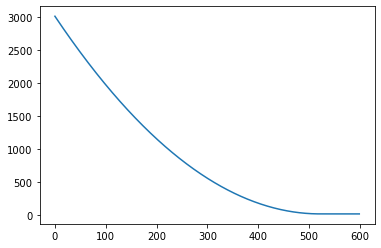

In [64]:
plt.plot(logs[:600])